In [40]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

sns.set()

from sklearn.preprocessing import quantile_transform

In [41]:
plt.style.use('seaborn')

In [42]:
%matplotlib notebook

Place fields:
* circular
* roughly same size
* holes/obstacles are langer than the diameter of place fields
* convex

Try:
0. holes
1. holes
2. holes
3. holes

Requirement: <br>
Trajectory must pass through each pairwise intersection of place fields

In [43]:
N_SAMPLES = 10000
N_FIELDS = 90
N_NEURONS = 200

In [44]:
L = 1
pf_rad = 0.1*L
step = 0.1*L

In [45]:
from math import hypot, cos, sin, pi

def add_field(p, fields):
    for i, f in enumerate(fields):
        if hypot(f[0]-p[0], f[1]-p[1]) < pf_rad:
            return None
    return p

In [129]:
samples = list((np.array([0.1, 0.1]),))
phi = 0
fields = []

In [130]:
def in_hole(px, py, hx, hy, hx1, hy2):
    return (px > hx and px < hx1) and (py > hy and py < hy2)
def update_pos(p, phi, dp, r):
    phi = phi + dp
    if phi > pi:
        phi -= 2 * pi
    if phi < -pi:
        phi += 2 * pi
    dx = r * cos(phi)
    dy = r * sin(phi)
    px = p[0] + dx
    py = p[1] + dy
    if px > 1 or px < 0:
        return None, None
    if py > 1 or py < 0:
        return None, None

    
#     1 hole
#     if (px > 0.3 and px < 0.7) and (py > 0.3 and py < 0.7):
#         return None, None
#     2 holes
#     if (in_hole(px, py, 0.1, 0.1, 0.4, 0.4)
#         or in_hole(px, py, 0.6, 0.6, 0.9, 0.9)):
#         return None, None
#     3 holes
#     if (in_hole(px, py, 0.1, 0.1, 0.4, 0.4)
#         or in_hole(px, py, 0.6, 0.6, 0.9, 0.9)
#         or in_hole(px, py, 0.1, 0.6, 0.4, 0.9)):
#         return None, None
#     4 holes
    if (in_hole(px, py, 0.1, 0.1, 0.4, 0.4)
        or in_hole(px, py, 0.6, 0.6, 0.9, 0.9)
        or in_hole(px, py, 0.1, 0.6, 0.4, 0.9)
        or in_hole(px, py, 0.6, 0.1, 0.9, 0.4)):
        return None, None
    return np.array([px, py]), phi

<IPython.core.display.Javascript object>


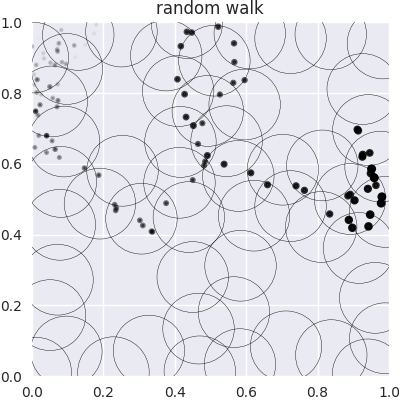

In [131]:
import matplotlib.pyplot as plt 
import matplotlib.animation as animation 
import numpy as np
from sklearn.preprocessing import quantile_transform


N_DOTS = 100


fig, ax =  plt.subplots(figsize=(4, 4), ncols=1)
ax.set_xlim(0, 1)
ax.set_ylim(0, 1)
ax.set_title('random walk')

colors = np.concatenate((np.zeros((N_DOTS, 3)), np.linspace(0, 1, N_DOTS).reshape(1,-1).T), axis=1)
scat = ax.scatter([], [], lw=2)
scat.set_color(colors)
sizes = np.exp(np.linspace(0, 3, N_DOTS))
scat.set_sizes(sizes)

def animate(i):
    global phi
    r = np.random.uniform(0, 0.1*L)
    dp = np.random.uniform(-pi/4, pi/4)
    p, phi_new = update_pos(samples[-1], phi, dp, r)
    if p is None:
        phi = phi + pi / 4
        if phi > pi:
            phi -= 2 * pi
        if phi < -pi:
            phi += 2 * pi
    else:
        phi = phi_new
        samples.append(p)
        f = add_field(samples[-1], fields)
        if f is not None:
            fields.append(f)
            circle = plt.Circle(f, pf_rad, fill=False, edgecolor='black')
            ax.add_artist(circle)

    
    scat.set_offsets(samples[-N_DOTS:])
    fig.gca().relim()
    fig.gca().autoscale_view()


# call the animator
anim = animation.FuncAnimation(fig, animate,frames=1000,
                               interval=5, repeat=True, blit=True) 
plt.tight_layout(pad=0)
plt.show()

In [132]:
len(samples)

5802

In [133]:
len(fields)

54

## update cells

In [134]:
cells = np.random.uniform(0, 0.2, size=(0, len(fields)))
def update_cells(p):
    global cells
    #global fields
    c = np.zeros((1, len(fields)))
    for i, f in enumerate(fields):
        #print(1/hypot(f[0]-p[0], f[1]-p[1]))
        l = min(10, 1/hypot(f[0]-p[0], f[1]-p[1]))
        c[0][i] = np.random.gamma(l, 1)
    cells = np.append(cells, c, axis=0)

<IPython.core.display.Javascript object>


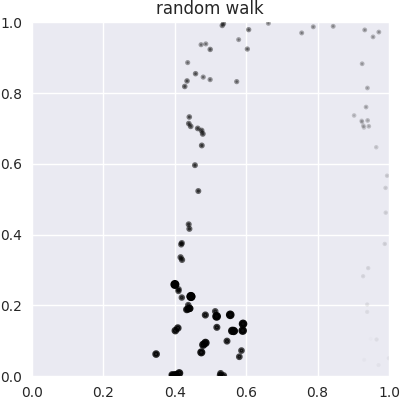

In [135]:
import matplotlib.pyplot as plt 
import matplotlib.animation as animation 
import numpy as np
from sklearn.preprocessing import quantile_transform


N_DOTS = 100


fig, ax =  plt.subplots(figsize=(4, 4), ncols=1)
ax.set_xlim(0, 1)
ax.set_ylim(0, 1)
ax.set_title('random walk')

colors = np.concatenate((np.zeros((N_DOTS, 3)), np.linspace(0, 1, N_DOTS).reshape(1,-1).T), axis=1)
scat = ax.scatter([], [], lw=2)
scat.set_color(colors)
sizes = np.exp(np.linspace(0, 3, N_DOTS))
scat.set_sizes(sizes)

def animate(i):
    global phi
    r = np.random.uniform(0, 0.1*L)
    dp = np.random.uniform(-pi/4, pi/4)
    p, phi_new = update_pos(samples[-1], phi, dp, r)
    if p is None:
        phi = phi + pi / 4
        if phi > pi:
            phi -= 2 * pi
        if phi < -pi:
            phi += 2 * pi
    else:
        phi = phi_new
        samples.append(p)
        update_cells(p)

    
    scat.set_offsets(samples[-N_DOTS:])
    fig.gca().relim()
    fig.gca().autoscale_view()


# call the animator
anim = animation.FuncAnimation(fig, animate,frames=1000,
                               interval=5, repeat=True, blit=True) 
plt.tight_layout(pad=0)
plt.show()

In [138]:
len(cells)

4387

generate noise

In [139]:
noise = np.random.exponential(0.5, size=(len(cells), N_NEURONS-len(cells[0])))

In [140]:
cells_with_noise = np.hstack((cells, noise))

In [141]:
full = pd.DataFrame(cells_with_noise)
full.columns = full.columns.astype(str) + 'N'
full['x'] = np.array(samples)[len(samples)-len(cells):, 0]
full['y'] = np.array(samples)[len(samples)-len(cells):, 1]

In [142]:
full.head()

,0N,1N,2N,3N,4N,5N,6N,7N,8N,9N,...,192N,193N,194N,195N,196N,197N,198N,199N,x,y
0,0.046918,0.921363,1.088988,0.186936,0.029365,1.147377,1.588071,2.321269,5.341445,0.938754,...,0.112726,0.556409,0.112937,0.033636,0.686915,0.674996,1.115935,0.075780,0.917177,0.866558
1,0.205326,0.780217,1.423531,0.622266,3.344086,1.274516,2.718193,1.355622,0.136191,0.431550,...,0.396836,0.041490,0.544488,0.794722,0.077362,0.200488,0.193380,0.022409,0.875756,0.917848
2,0.544231,0.659844,0.549587,1.292514,0.879968,0.377592,1.016291,1.242029,0.276750,1.019936,...,0.157513,0.458764,0.222992,0.601816,0.798391,0.408691,0.253705,0.435305,0.876002,0.921745
3,0.000676,2.861771,0.729265,0.603579,0.668998,2.281268,1.427936,1.281205,2.867467,0.173347,...,0.269284,0.180393,1.680339,0.269887,0.062226,0.610341,0.394685,0.787559,0.901556,0.950263
4,0.391286,1.755087,0.019567,0.021499,0.063420,1.480327,1.538168,0.705456,0.640784,2.132979,...,0.709853,0.261021,0.731569,0.803396,0.064975,0.435624,0.229003,0.296042,0.934873,0.965436


In [143]:
def get_angle(coordinates, cx = 0, cy = 0):
    return np.angle((coordinates['x'] - cx) + 1j * (coordinates['y'] - cy))

In [144]:
cx = 0.5
cy = 0.5
full['ang'] = get_angle(full, cx, cy)

<IPython.core.display.Javascript object>


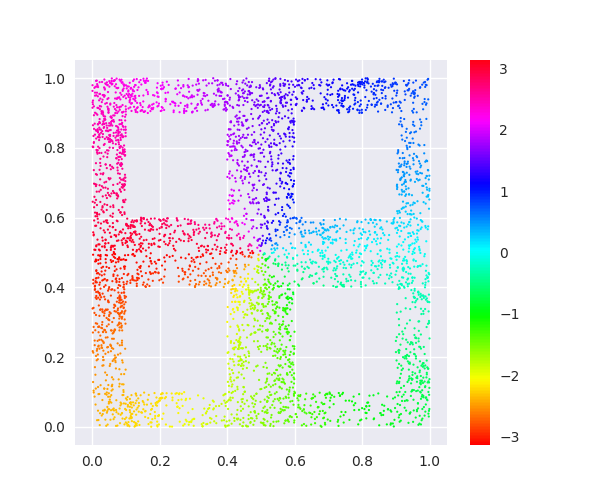

In [145]:
fig, ax = plt.subplots(figsize=(6, 5), ncols=1)
plt.scatter(full['x'], full['y'],
        c=full['ang'],
        cmap='hsv',
        linewidth=0,
        s=2.5)
plt.plot(cx, cy, 'cx') 
plt.colorbar();

In [125]:
full.to_csv("data/gen_4_holes.csv")

# neurons walk 
quick sanity check

In [33]:
from sklearn.feature_selection import mutual_info_regression

In [34]:
mi = full.drop(['x', 'y'], axis=1)

In [ ]:
MI_NEURONS = 20

In [ ]:
mi_scores = mutual_info_regression(mi.drop(['ang'], axis=1), mi['ang'])

In [ ]:
mi_scores_df = pd.DataFrame([mi_scores], columns=mi.drop(['ang'],axis=1).columns).T.rename(columns={0: 'mi_score'})

In [ ]:
mi_scores_df = mi_scores_df.sort_values(by=['mi_score'], ascending=False)

In [ ]:
mi_scores_df = mi_scores_df.iloc[:MI_NEURONS]

In [ ]:
fig, ax = plt.subplots(figsize=(6, 6), ncols=1)

ax = sns.barplot(x=mi_scores_df['mi_score'], y=mi_scores_df.index, ax=ax);
ax.set_title("MI-scores of 24 best neurons");
fig.tight_layout();

In [ ]:
#mi_scores_df.to_csv("data/gen_mi_best_neurons.csv")

<IPython.core.display.Javascript object>


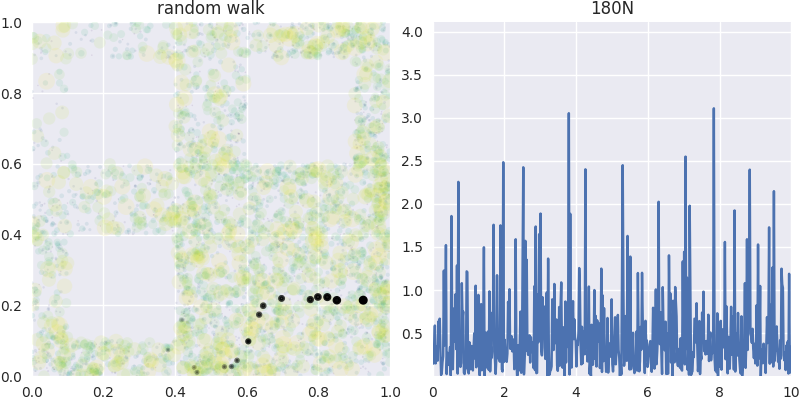

In [128]:
import matplotlib.pyplot as plt 
import matplotlib.animation as animation 
import numpy as np

from sklearn.preprocessing import quantile_transform


N_DOTS = 20

fig, ax =  plt.subplots(figsize=(8, 4), ncols=2)

ax[0].set_xlim(0, L)
ax[0].set_ylim(0, L)
ax[0].set_title('random walk')

col = '180N'
# pre drawing activity
s = full.loc[:, ['x', 'y', col]].sort_values(col)
s[col] = quantile_transform(s[col].values.reshape(-1, 1), copy=True)
ax[0].scatter(s['x'], s['y'],
            c=s[col],
            cmap='viridis',
            linewidth=0,
            s=np.exp(5*s[col]),
            alpha=0.1,
            edgecolors='none')

scat = ax[0].scatter(full[:N_DOTS]['x'], full[:N_DOTS]['y'], lw=2)
scat.set_color(colors)
sizes = np.exp(np.linspace(0, 3, N_DOTS))
scat.set_sizes(sizes)

nl = full[col]
ax[1].set_xlim(0, 10)
ax[1].set_ylim(nl.min(), nl.max())
ax[1].set_title(col)
line, = ax[1].plot(nl[:N_DOTS])

colors = np.concatenate((np.zeros((N_DOTS, 3)), np.linspace(0, 1, N_DOTS).reshape(1,-1).T), axis=1)

# animation function 
def animate(i):
    scat.set_offsets(np.array([full[i:i+N_DOTS]['x'], full[i:i+N_DOTS]['y']]).T)
    start = 0
    if i > 500:
        start = i - 500
    line.set_data(np.linspace(0, 10, i+N_DOTS-start), nl[start:i+N_DOTS])


# call the animator
anim = animation.FuncAnimation(fig, animate,frames=full.shape[0],
                               interval=10, repeat=True, blit=True) 
plt.tight_layout(pad=0)
plt.show()